# Linear Regression

First, we will explore linear regression with one variable. For this, we will study the data of profit vs population. 

In [125]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Loading the data. 

In [126]:
train_file_path = "/home/shantanu/PycharmProjects/Kaggle/DAT21_Linear_Regression_Assignment/train.csv"
test_file_path = "/home/shantanu/PycharmProjects/Kaggle/DAT21_Linear_Regression_Assignment/test.csv"
data = pd.read_csv(train_file_path)
data_test = pd.read_csv(test_file_path)

## Data exploration

(10000, 12)


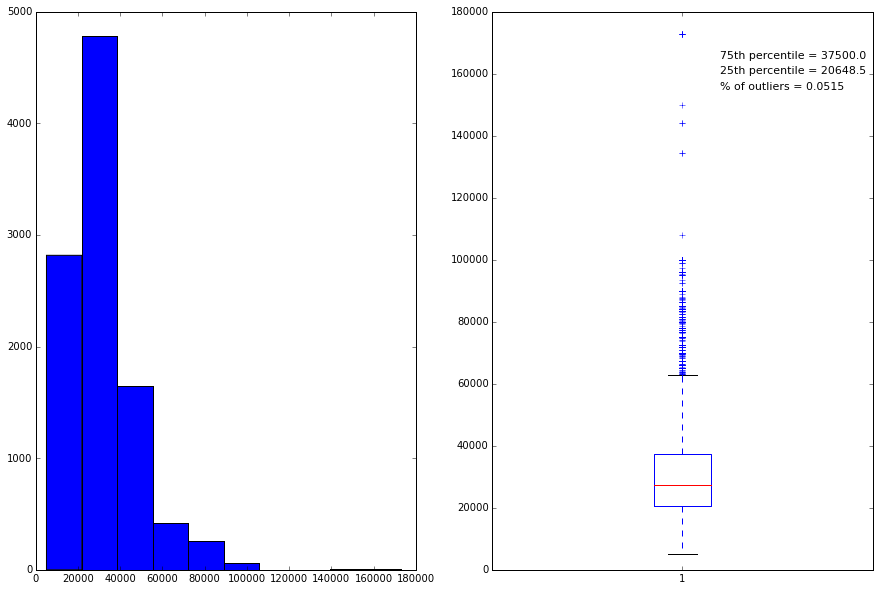

In [127]:
print data.shape # (10000, 12)

# Plotting the salary in histogram and box plot
salary = data['SalaryNormalized'].values

f = data['SalaryNormalized'].describe()
IQR = f['75%'] - f['25%']
upper_outlier_boundary = f['75%'] + 1.5*IQR
lower_outlier_boundary = f['25%'] - 1.5*IQR

fig = plt.figure(figsize=(15,10))
ax_hist = fig.add_subplot(121)
ax_hist.hist(salary)
ax_box = fig.add_subplot(122)
ax_box.boxplot(salary)
ax_box.text(1.1,165000, '75th percentile = {}'.format(f['75%']), fontsize=11)
ax_box.text(1.1,160000, '25th percentile = {}'.format(f['25%']), fontsize=11)
ax_box.text(1.1,155000, '% of outliers = {}'.format(sum(salary>upper_outlier_boundary) / float(data.shape[0])), fontsize=11)
plt.show()

In [128]:
#print data.head

# Exploring catagorical variables

## Exploring LocationNormalized

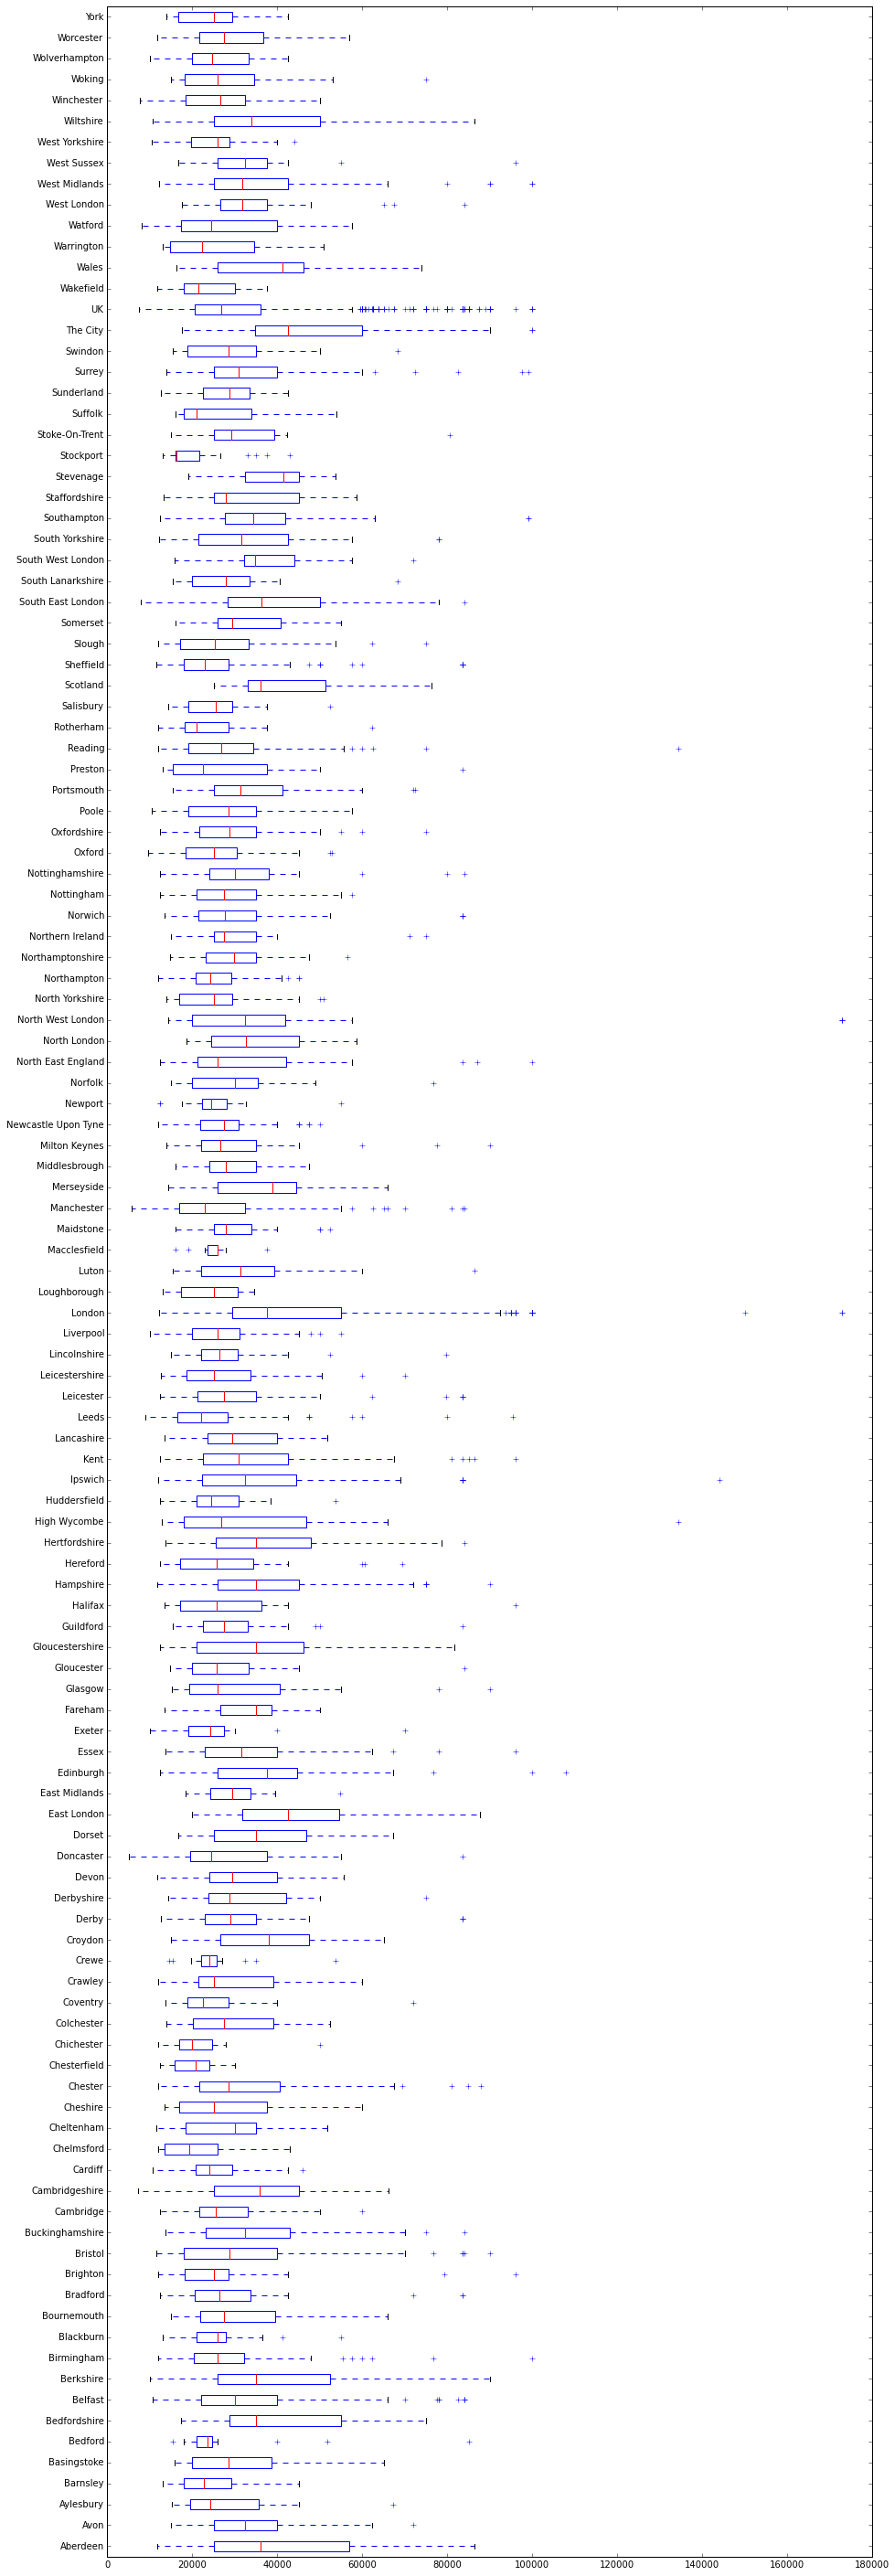

In [129]:
grouped = data.groupby('LocationNormalized')

salary_per_location=[]
locations = []

for location, group in grouped:
    if group.shape[0]>15:
        temp = group['SalaryNormalized'].values
        temp.shape = (-1, 1)
        salary_per_location.append(temp)
        locations.append(location)

fig = plt.figure(figsize=(15,50))
ax_box = fig.add_subplot(111)
ax_box.boxplot(salary_per_location, vert=False)

plt.yticks(np.arange(1, len(locations)+1), locations)
plt.show()

## Exploting ContractType

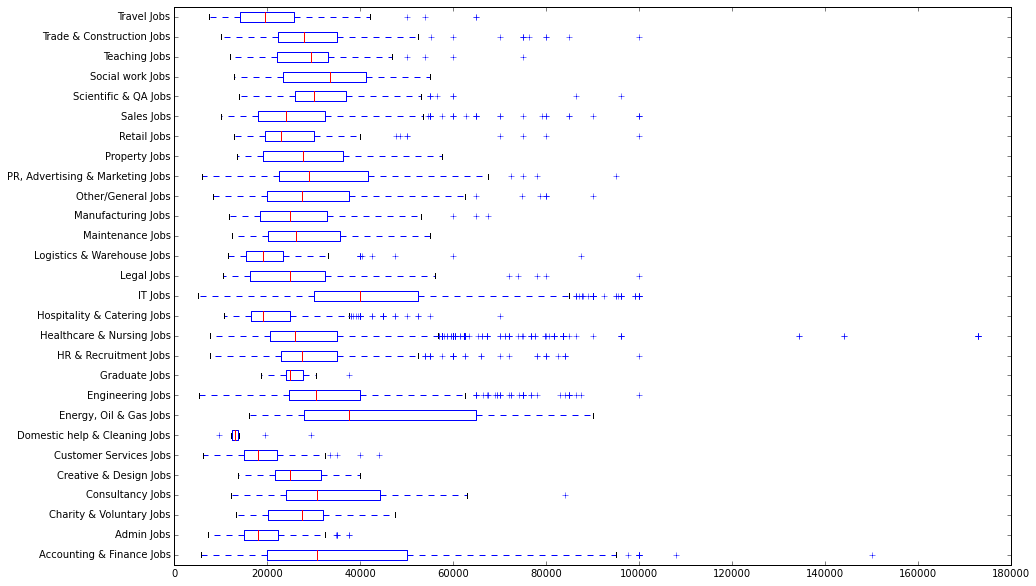

In [158]:
data['ContractType'].fillna('NotAvailable', inplace=True)

salary_per_contractType=[]
contractTypes = []

for contractType, group in grouped:
    temp = group['SalaryNormalized'].values
    temp.shape = (-1, 1)
    salary_per_contractType.append(temp)
    contractTypes.append(contractType)
    
fig = plt.figure(figsize=(15,10))
ax_box = fig.add_subplot(111)
ax_box.boxplot(salary_per_contractType, vert=False)
plt.yticks(np.arange(1, len(contractTypes)+1), contractTypes)
plt.show()

## Exploring ContractTime

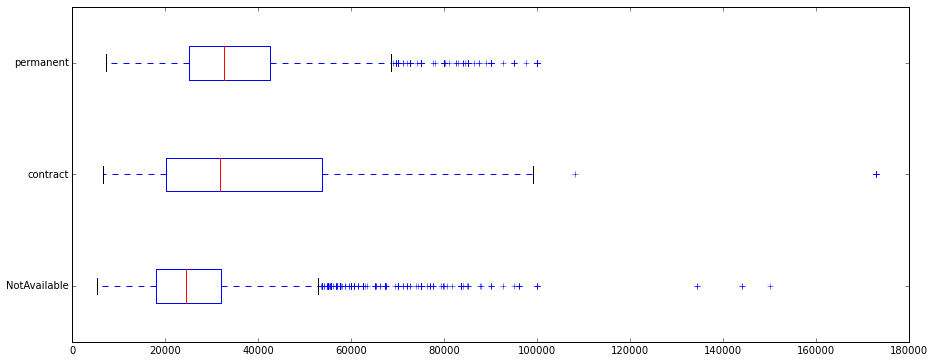

In [131]:
data['ContractTime'].fillna('NotAvailable', inplace=True)

grouped = data.groupby('ContractTime')

salary_per_contractTime=[]
contractTimes = []

for contractTime, group in grouped:
    temp = group['SalaryNormalized'].values
    temp.shape = (-1, 1)
    salary_per_contractTime.append(temp)
    contractTimes.append(contractTime)
    
fig = plt.figure(figsize=(15,6))
ax_box = fig.add_subplot(111)
ax_box.boxplot(salary_per_contractTime, vert=False)
plt.yticks(np.arange(1, len(contractTimes)+1), contractTimes)
plt.show()

## Exploring Catagory

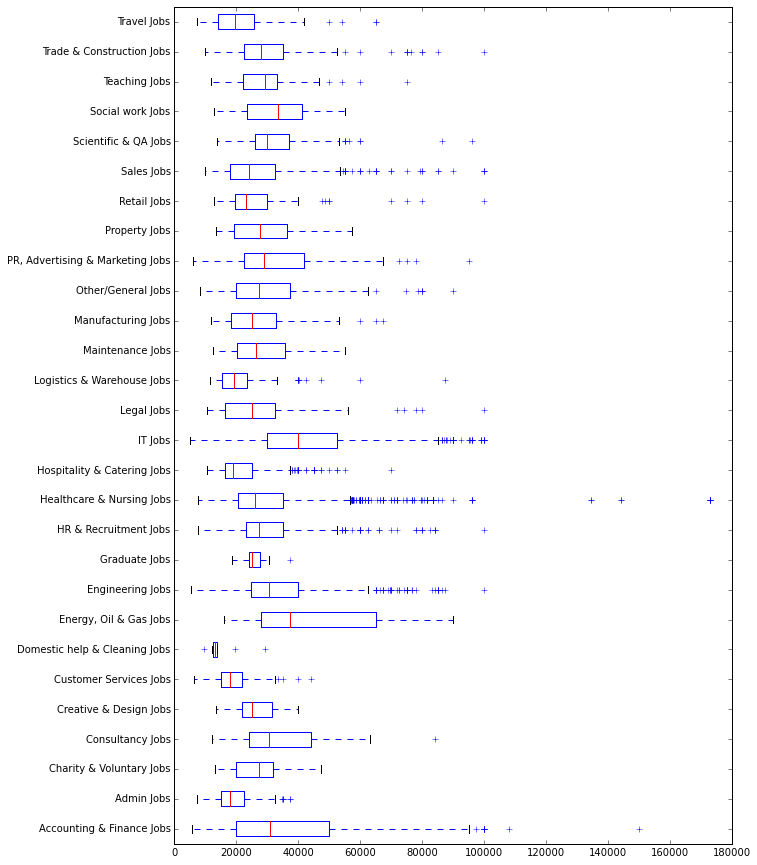

In [132]:
grouped = data.groupby('Category')

salary_per_category=[]
categories = []

for category, group in grouped:
    temp = group['SalaryNormalized'].values
    temp.shape = (-1, 1)
    salary_per_category.append(temp)
    categories.append(category)
    
fig = plt.figure(figsize=(10,15))
ax_box = fig.add_subplot(111)
ax_box.boxplot(salary_per_category, vert=False)
plt.yticks(np.arange(1, len(categories)+1), categories)
plt.show()

# Converting catagorical variables into integers
 The variables we will be interested in are:
Location, ContractType, ContractTime and Category
Had these variables been Nominal, the below method would have worked

In [133]:
from sklearn.preprocessing import LabelBinarizer

location_label_binarizer = LabelBinarizer()
location_training_mat = location_label_binarizer.fit_transform(data['LocationNormalized'])

contractType_label_binarizer = LabelBinarizer()
contractType_training_mat = contractType_label_binarizer.fit_transform(data['ContractType'])

contractTime_label_binarizer = LabelBinarizer()
contractTime_training_mat = contractTime_label_binarizer.fit_transform(data['ContractTime'])

category_label_binarizer = LabelBinarizer()
category_training_mat = category_label_binarizer.fit_transform(data['Category'])

X_train = np.hstack((location_training_mat, contractType_training_mat))
X_train = np.hstack((X_train, contractTime_training_mat))
X_train = np.hstack((X_train, category_training_mat))

Y_train = data['SalaryNormalized'].values

print Y_train.shape
print X_train.shape

(10000,)
(10000, 933)


## Using Lasso as a linear regression estimator

In [156]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso_param_range = [0.5, 1.0, 5.0, 10.0, 100]
train_scores, test_scores = validation_curve(estimator=lasso,
                                            X=X_train,
                                            y=Y_train,
                                            param_name='alpha',
                                            param_range=lasso_param_range,
                                            cv=5)

## Doing cross-validation for regularization parameter

[ 0.33097633  0.32556983  0.28934023  0.27071506  0.2084623 ]


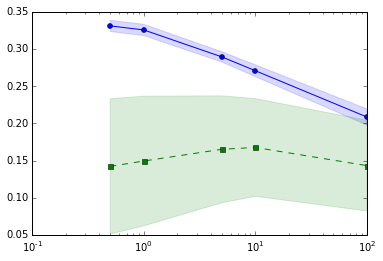

In [157]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(lasso_param_range, train_mean, 
         color='blue', marker='o',
         markersize=5,
         label='training accuracy')

plt.fill_between(lasso_param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(lasso_param_range, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5,
         label='validation accuracy')

plt.fill_between(lasso_param_range, test_mean + test_std,
                 test_mean - test_std, alpha=0.15,
                 color='green')

plt.xscale('log')
plt.show()

The best reularization we gat was for alpha = 10 

## Fitting the training data with the optimum alpha

In [172]:
ls = Lasso(alpha=10)
ls.fit(X_train, Y_train)

Lasso(alpha=10, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

# Predicting the test set

## Taking care of NaN

In [167]:
data_test['LocationNormalized'].fillna('NotAvailable', inplace=True)
data_test['ContractType'].fillna('NotAvailable', inplace=True)
data_test['ContractTime'].fillna('NotAvailable', inplace=True)
data_test['Category'].fillna('NotAvailable', inplace=True)

## Using LabelBinarizer which we got during training on test data

In [169]:
location_test_mat     = location_label_binarizer.transform(data_test['LocationNormalized'])
contractType_test_mat = contractType_label_binarizer.transform(data_test['ContractType'])
contractTime_test_mat = contractTime_label_binarizer.transform(data_test['ContractTime'])
category_test_mat     = category_label_binarizer.transform(data_test['Category'])

X_test = np.hstack((location_test_mat, contractType_test_mat))
X_test = np.hstack((X_test, contractTime_test_mat))
X_test = np.hstack((X_test, category_test_mat))

## Make prediction

In [220]:
Y_pred = ls.predict(X_test)
Y_pred.shape=(-1,1)
Y_pred.astype(int, copy=False)

array([[31928],
       [41061],
       [51337],
       ..., 
       [30382],
       [31999],
       [24317]])

## Store it in a file for submission

In [230]:
idx = data_test['Id'].values
idx.shape = (-1,1)
idx.astype(int, copy=False)

predict_mat = np.hstack((idx, Y_pred))

wfile = open('/home/shantanu/PycharmProjects/Kaggle/DAT21_Linear_Regression_Assignment/predictedSalary.csv', 'w')
wfile.write('%s\n' % 'Id,PredictedSalary')
for record in predict_mat:
    wfile.write('%d,%d\n' % (record[0], record[1]))
wfile.close()